In [1]:
from environment import Environment
from RL import q_learning, discretize_state
import plotting
import numpy as np

pygame 2.6.1 (SDL 2.28.4, Python 3.12.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
env = Environment(num_debris=1)

In [3]:
# State discretization
bins = {
    "satellite_position": [np.linspace(0, 10, 20), np.linspace(-2, 2, 20)],
    "satellite_velocity":  np.linspace(-3, 3, 61),
    "fuel": np.linspace(0, 5, 1),
    "debris_positions": [np.linspace(0, 10, 10), np.linspace(-2, 2, 10)],
    "debris_velocities": [np.linspace(-3, 3, 1), np.linspace(-3, 3, 1)] #vel actually goes from -5 to 5
}

In [4]:
print(bins["debris_velocities"])

[array([-3.]), array([-3.])]


In [5]:
Q,stats = q_learning(env, 50000, bins=bins, discount_factor=0.7)

Episode 50000/50000.

[<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>]

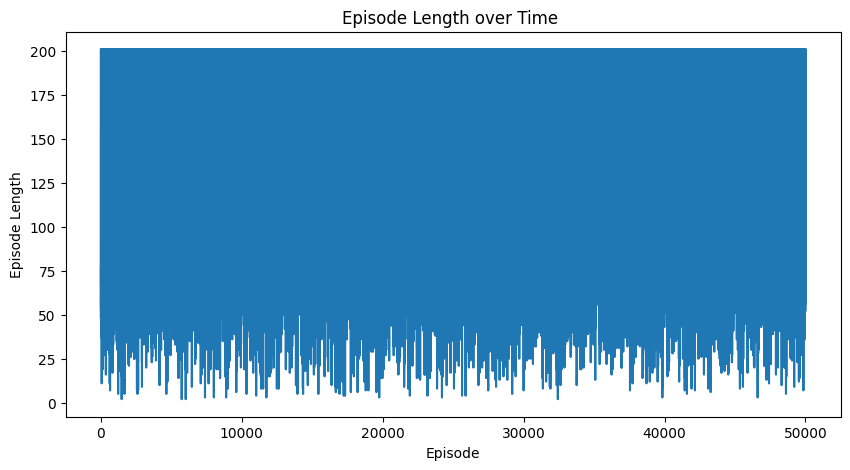

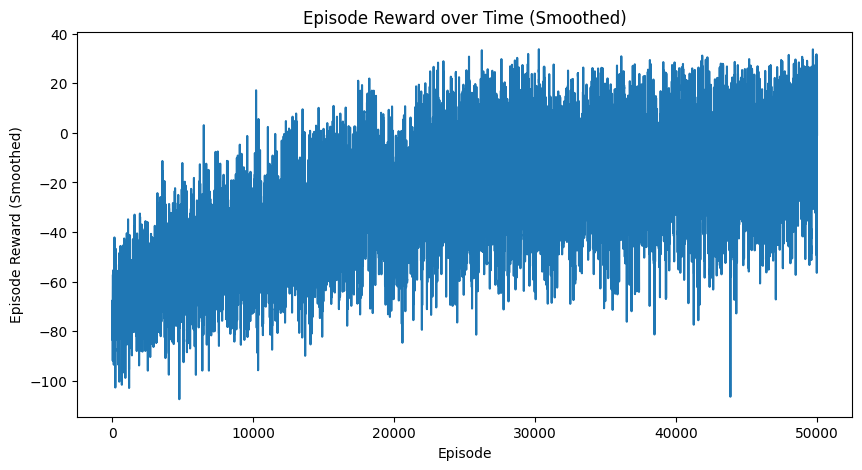

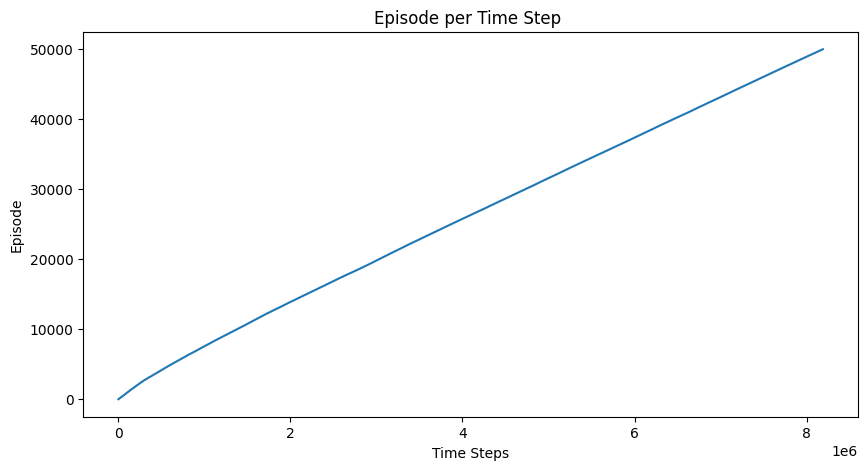

In [6]:
plotting.plot_episode_stats(stats)


[<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>]

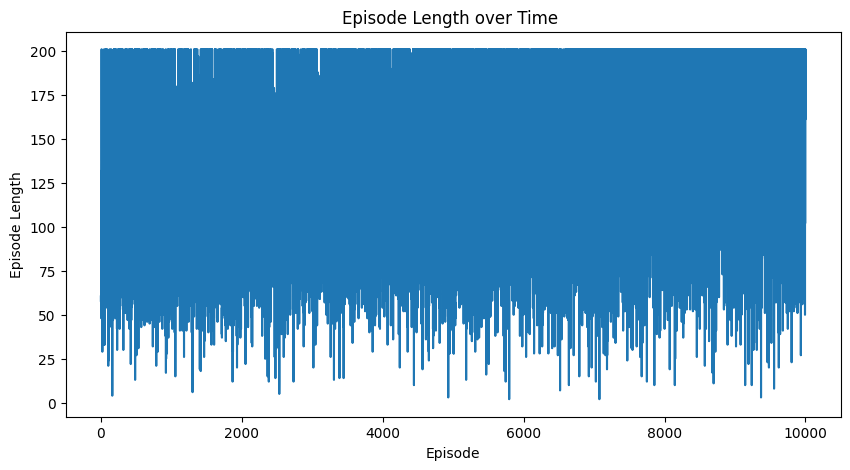

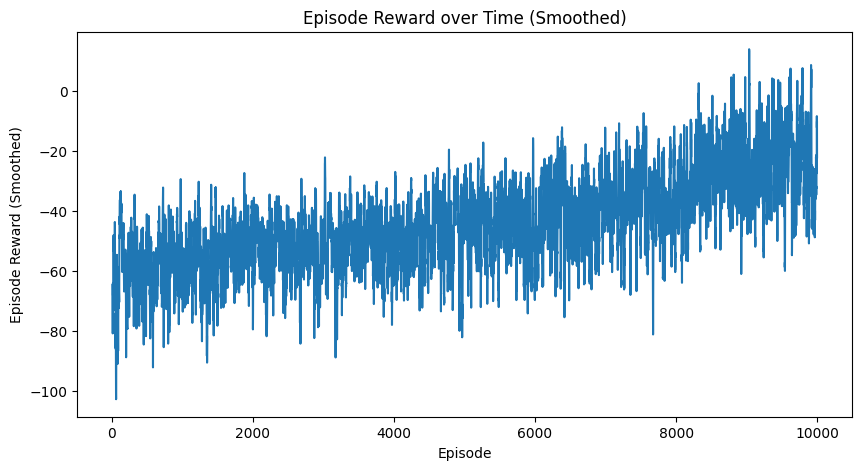

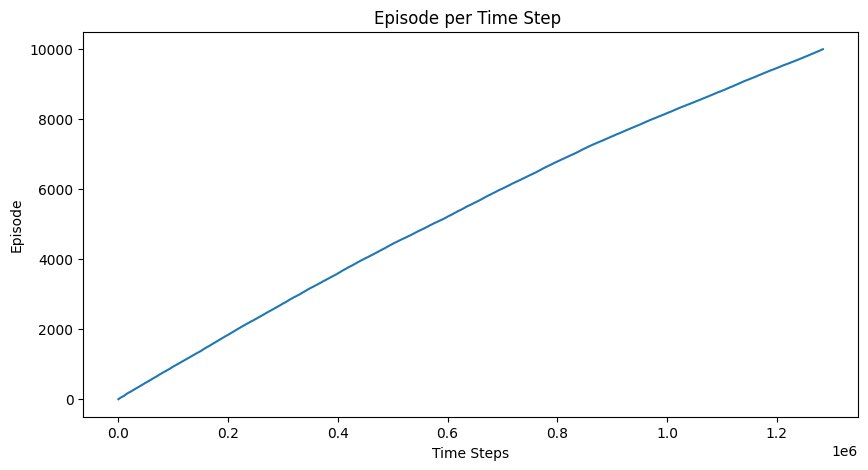

In [11]:
plotting.plot_episode_stats(stats)


[<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>]

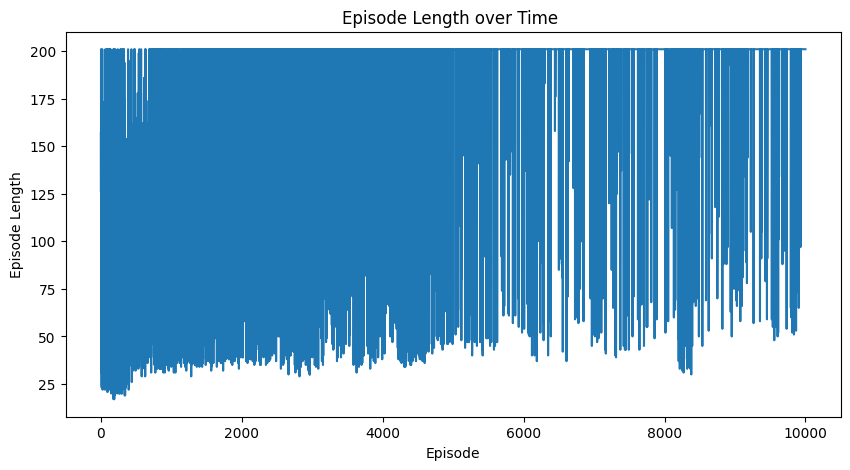

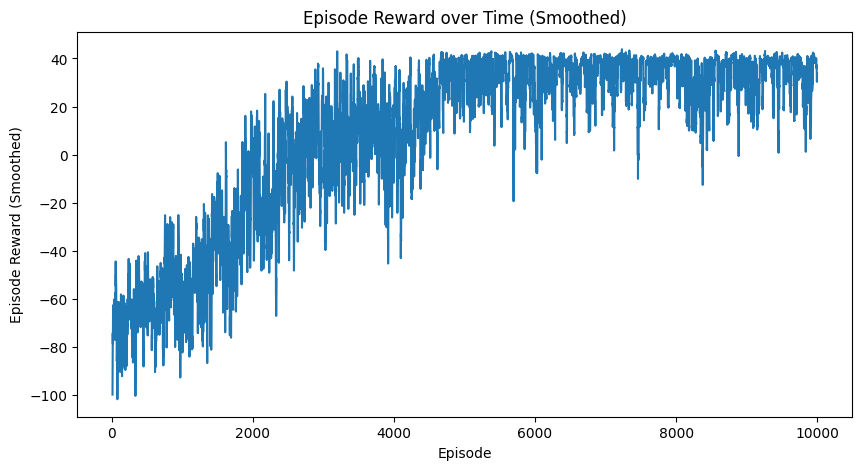

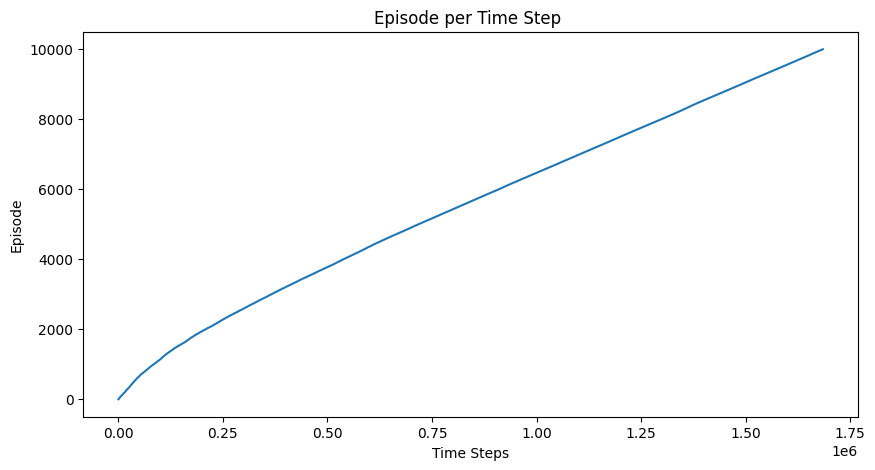

In [6]:
plotting.plot_episode_stats(stats)


[<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>]

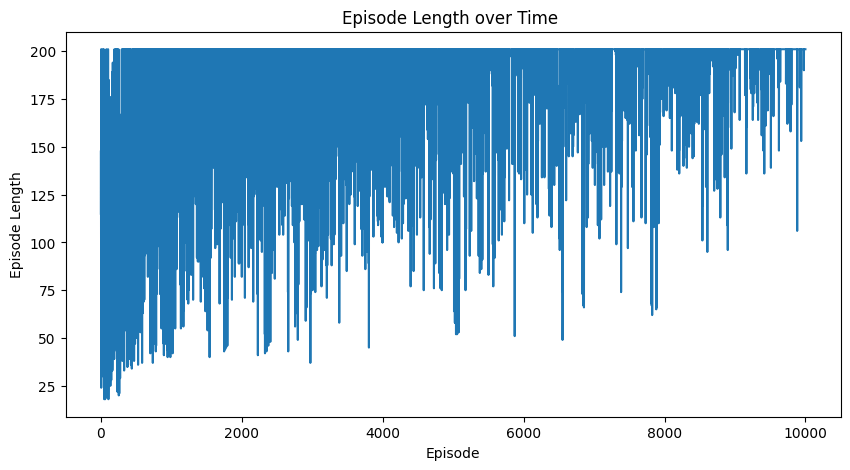

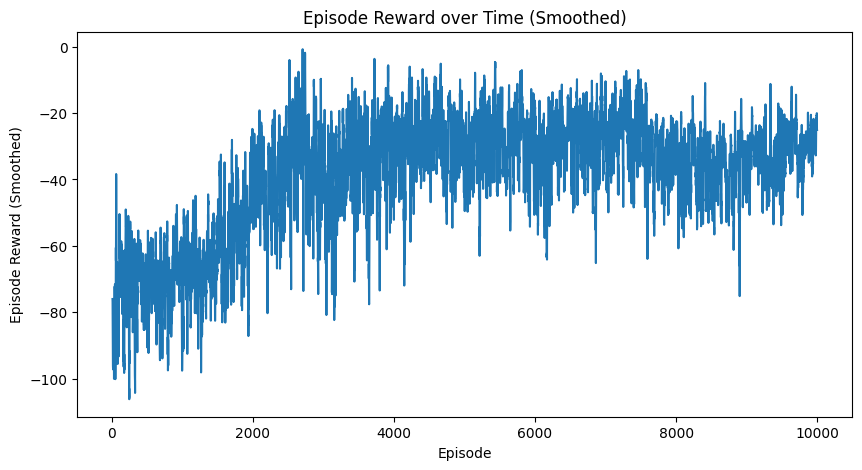

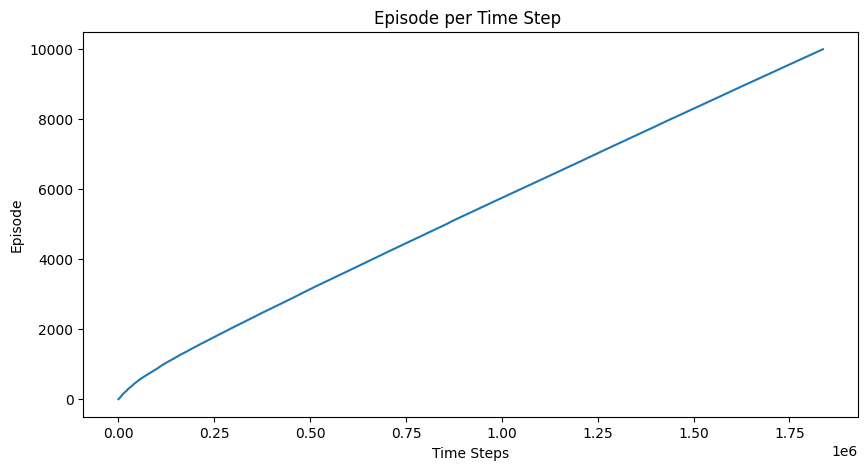

In [6]:
plotting.plot_episode_stats(stats)


Episode 1000/1000.

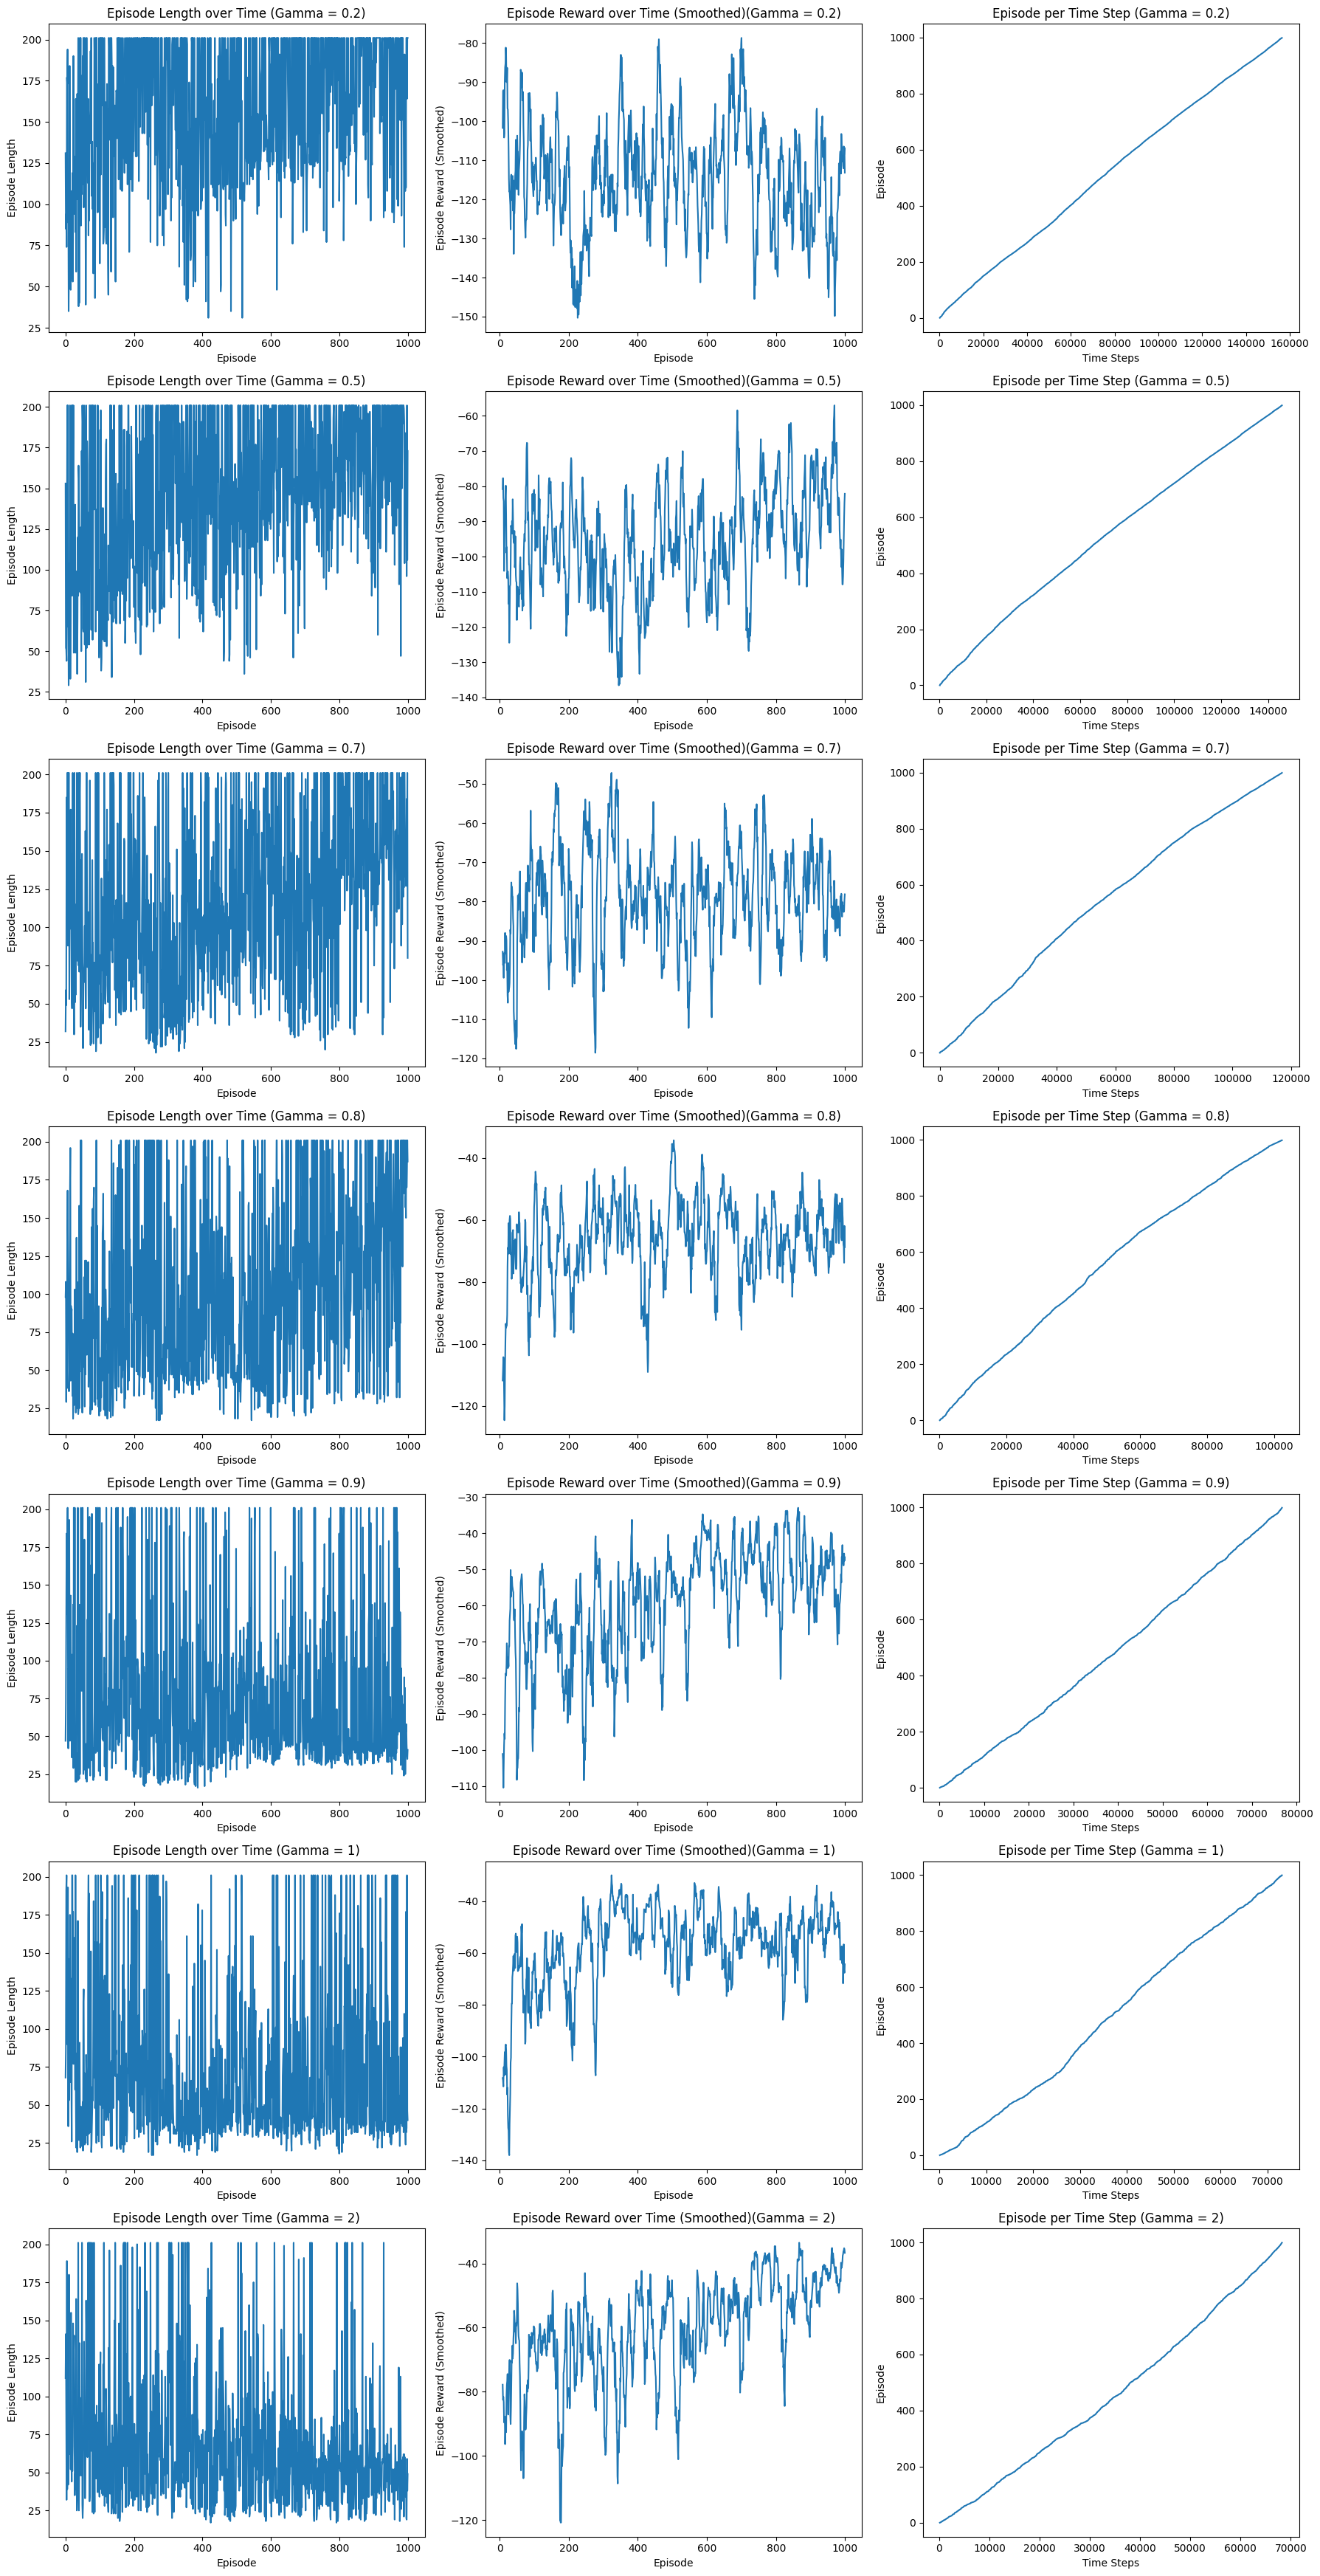

In [4]:
import matplotlib.pyplot as plt

discount_factors=[0.2, 0.5, 0.7, 0.8, 0.9, 1, 2]
num_factors = len(discount_factors)
fig, axes = plt.subplots(nrows=num_factors, ncols=3, figsize=(18, 5 * num_factors))

for i, gamma in enumerate(discount_factors):
    Q, stats = q_learning(env, 1000, bins=bins, discount_factor=gamma)
    plotting.plot_episode_stats(stats, axes=axes[i], title_suffix=f"(Gamma = {gamma})")

plt.tight_layout()
plt.show()

Episode 1000/1000.

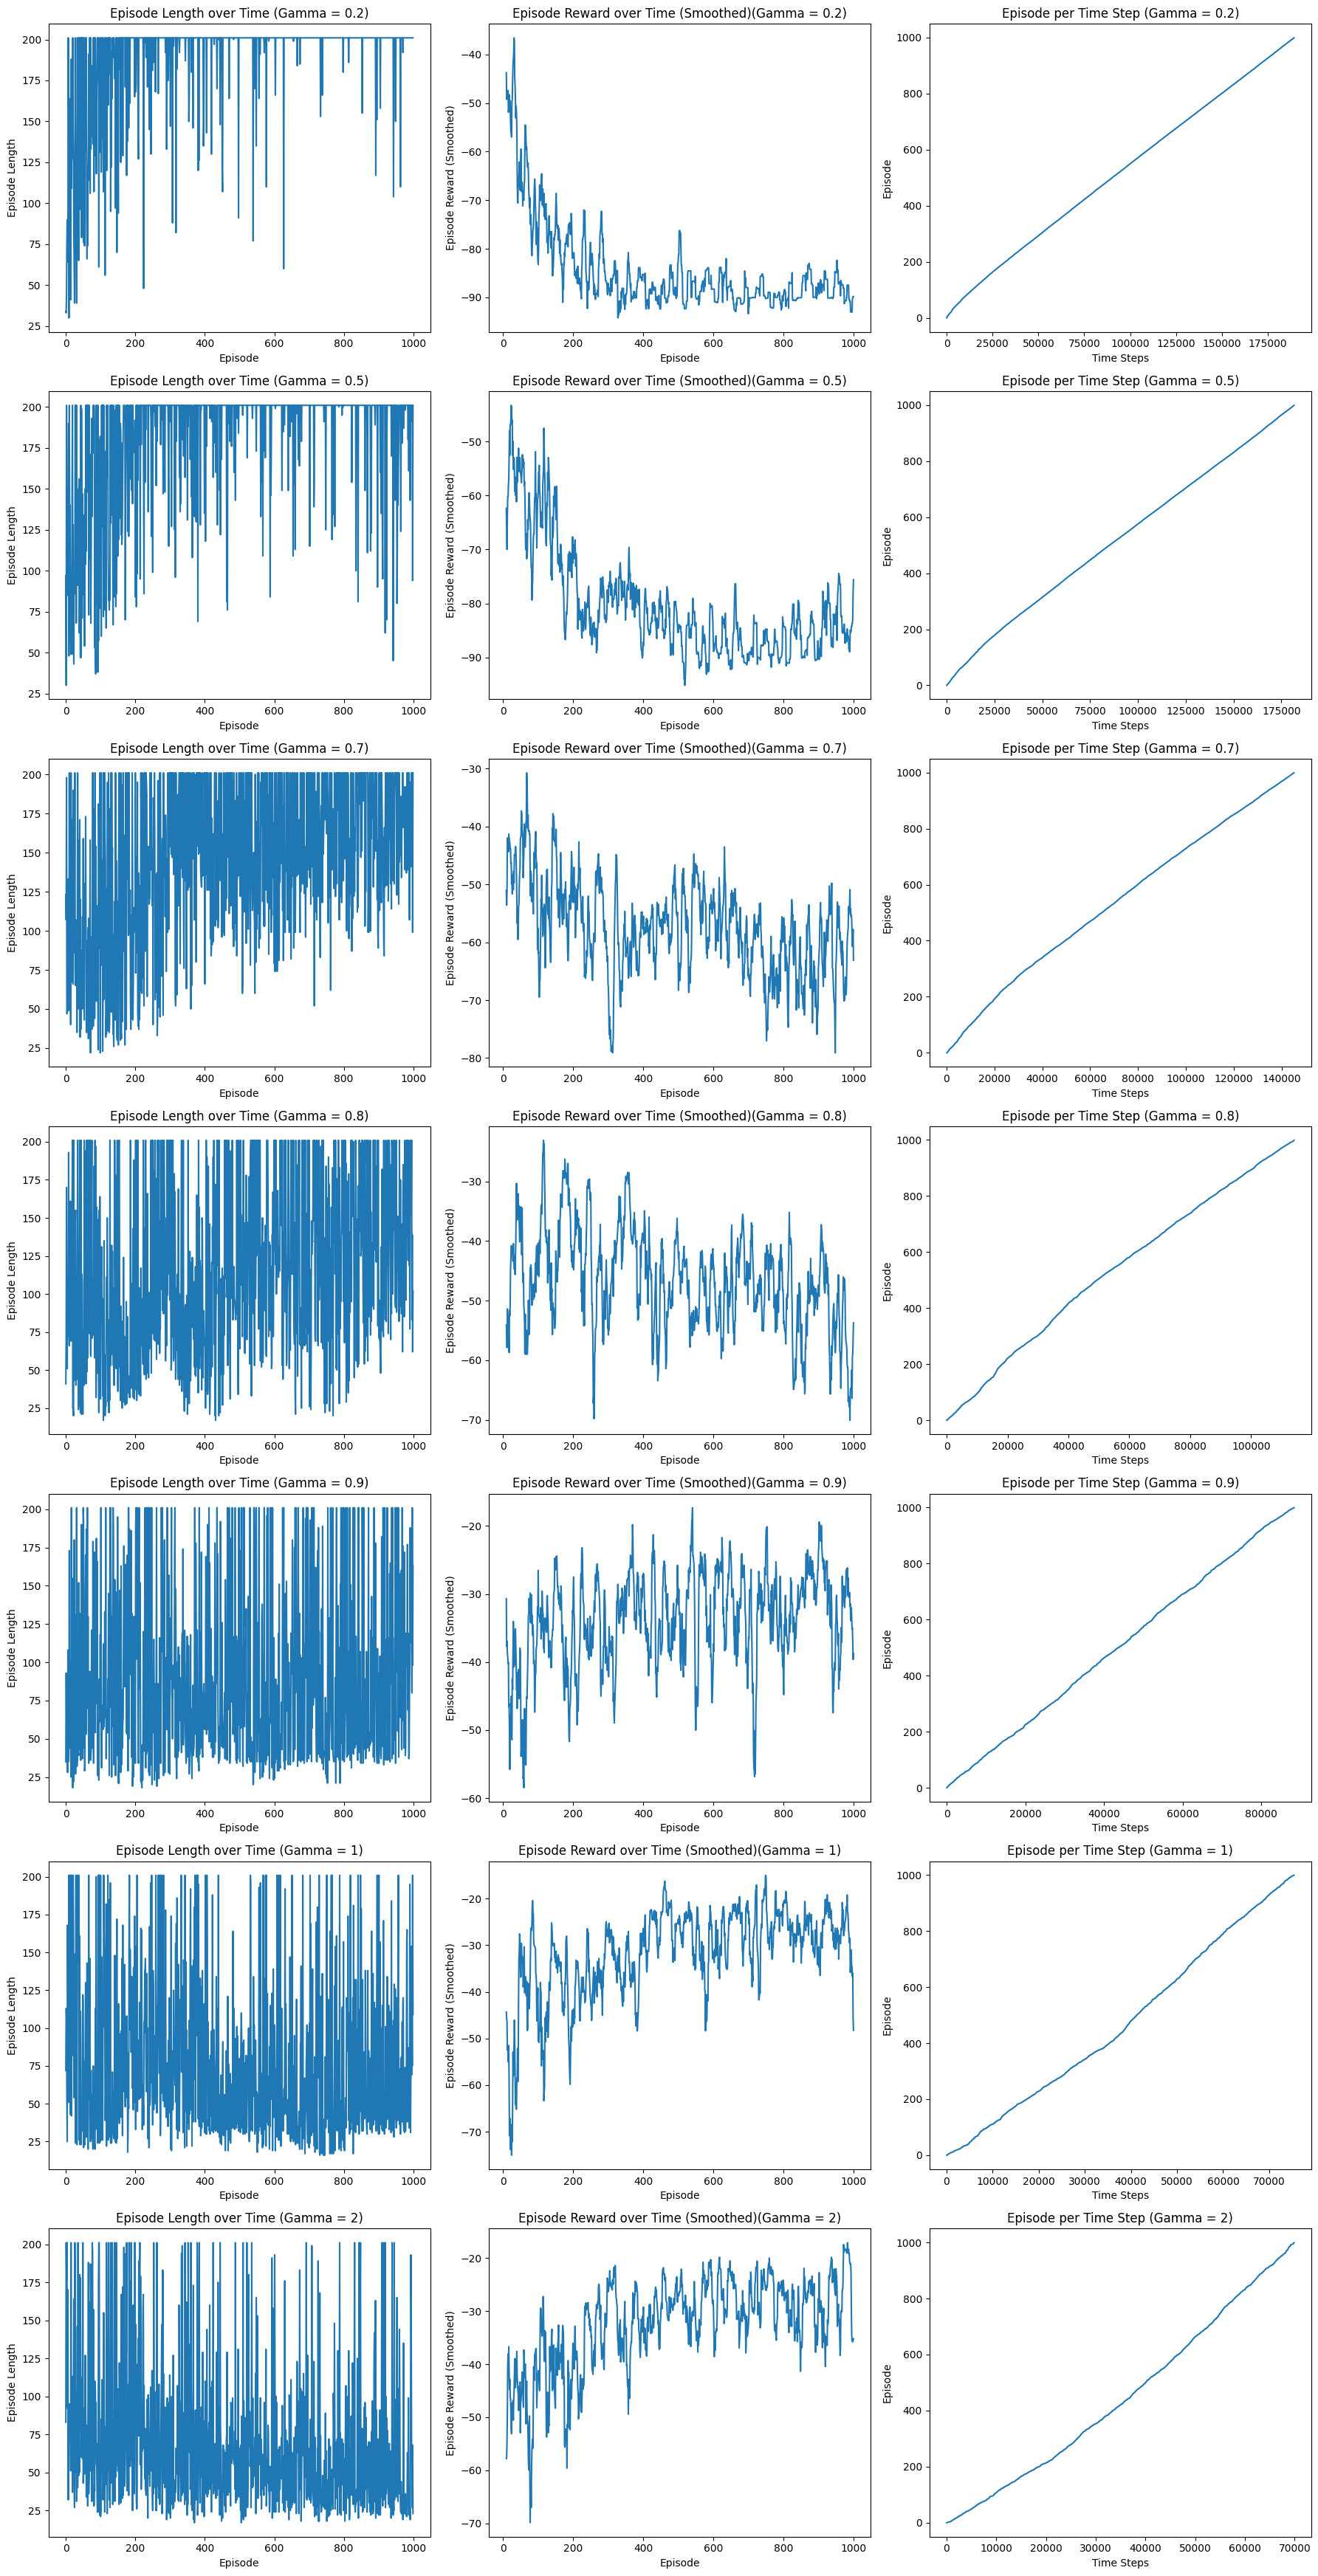

In [5]:
import matplotlib.pyplot as plt

discount_factors=[0.2, 0.5, 0.7, 0.8, 0.9, 1, 2]
num_factors = len(discount_factors)
fig, axes = plt.subplots(nrows=num_factors, ncols=3, figsize=(18, 5 * num_factors))

for i, gamma in enumerate(discount_factors):
    Q, stats = q_learning(env, 1000, bins=bins, discount_factor=gamma)
    plotting.plot_episode_stats(stats, axes=axes[i], title_suffix=f"(Gamma = {gamma})")

plt.tight_layout()
plt.show()

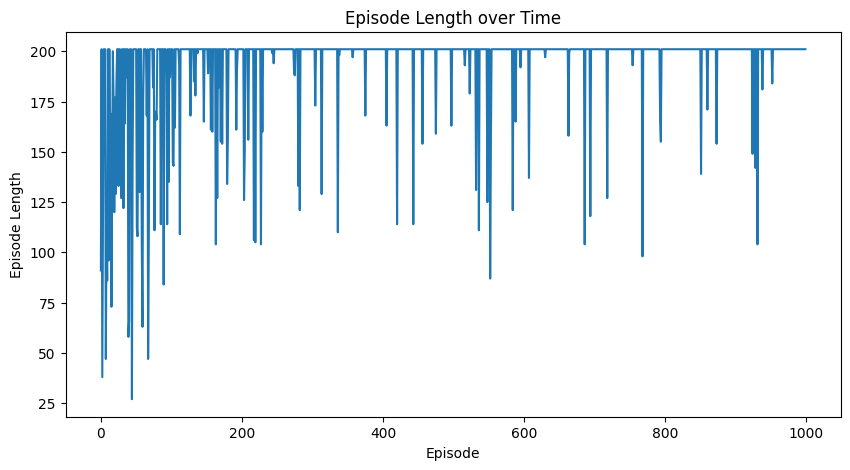

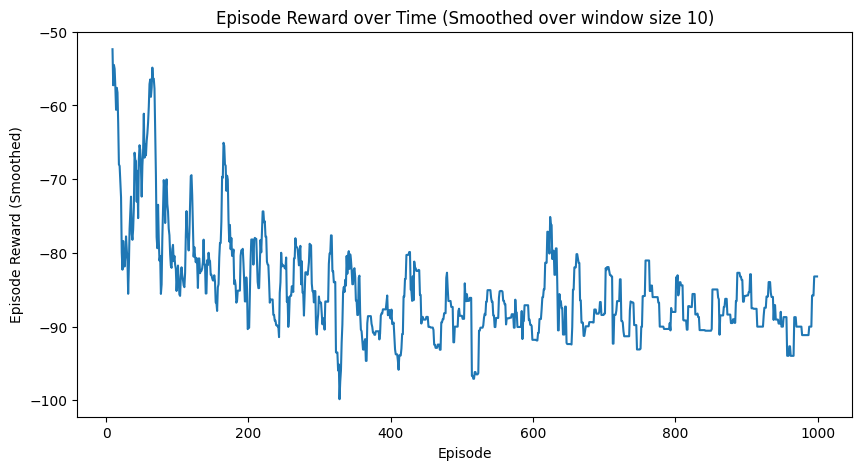

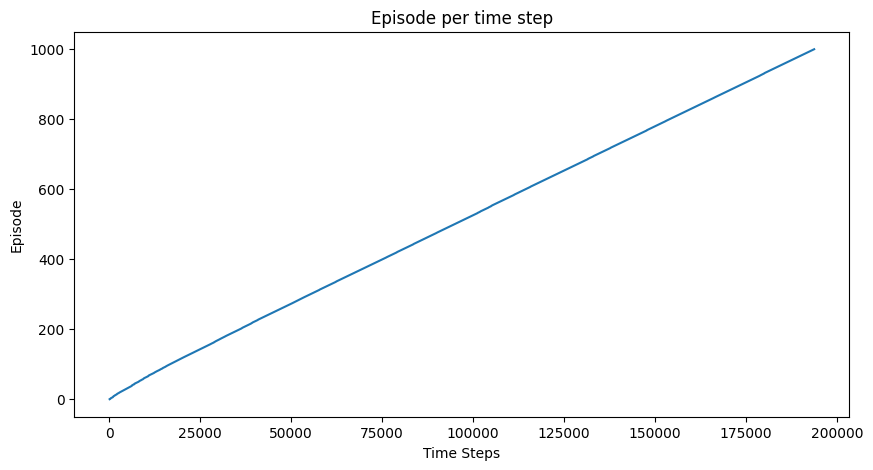

(<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>)

In [5]:
plotting.plot_episode_stats(stats)

In [10]:
import pygame

# Example usage
# env = Environment(num_debris=1)
state = env.reset()
observation = discretize_state(state, bins)
done = False


# Initialize Pygame
pygame.init()

# Set up display
width, height = 800, 600
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Satellite Collision Avoidance")

# Colors
white = (255, 255, 255)
black = (0, 0, 0)
red = (255, 0, 0)
blue = (0, 0, 255)


# Main loop
clock = pygame.time.Clock()
while not done:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            done = True

    # Select an action from the policy
    if np.max(Q[observation])==0:
        action_index = np.random.choice(list(range(len(Q[observation]))))
        action = env.action_space[action_index]
    else :
        action = env.action_space[np.argmax(Q[observation])]
    print("action:", action, "discretized_state: ", observation, "value: ", Q[observation])
    state, reward, done, termination_status = env.step(action)
    observation = discretize_state(state, bins)

    # Draw the environment
    env.draw(screen, width, height)

    # Cap the frame rate
    clock.tick(30)

    # Print status

print(f"Termination Cause: {termination_status}")

pygame.quit()


action: 0 discretized_state:  (np.int64(1), np.int64(10), np.int64(31), np.int64(1), ((np.int64(3), np.int64(5), np.int64(1), np.int64(1)),)) value:  [-0.29154895 -0.05742245 -0.30461062]
action: 0 discretized_state:  (np.int64(1), np.int64(10), np.int64(31), np.int64(1), ((np.int64(3), np.int64(5), np.int64(1), np.int64(1)),)) value:  [-0.29154895 -0.05742245 -0.30461062]
action: 0 discretized_state:  (np.int64(1), np.int64(10), np.int64(31), np.int64(1), ((np.int64(3), np.int64(5), np.int64(1), np.int64(1)),)) value:  [-0.29154895 -0.05742245 -0.30461062]
action: 0 discretized_state:  (np.int64(1), np.int64(10), np.int64(31), np.int64(1), ((np.int64(3), np.int64(5), np.int64(1), np.int64(1)),)) value:  [-0.29154895 -0.05742245 -0.30461062]
action: 0 discretized_state:  (np.int64(1), np.int64(10), np.int64(31), np.int64(1), ((np.int64(3), np.int64(5), np.int64(1), np.int64(1)),)) value:  [-0.29154895 -0.05742245 -0.30461062]
action: 0 discretized_state:  (np.int64(1), np.int64(10), np

In [27]:
Q.__sizeof__()

5242952

In [28]:
num_debris = 1

total_states = len(bins["satellite_position"][0])*len(bins["satellite_position"][1])*len(bins["satellite_velocity"]) * len(bins["fuel"]) * len(bins["debris_positions"][0])**num_debris * len(bins["debris_positions"][1]) ** num_debris * len(bins["debris_velocities"][0])**num_debris * len(bins["debris_velocities"][1]) ** num_debris

exploration = Q.__sizeof__()/total_states

print(total_states)
print(exploration)

61000000
0.08595003278688525


In [12]:
import pygame
import numpy as np

def render_discretized_state_pygame(screen, width, height, discretized_state, bins, offset_x, offset_y):
    """
    Render the discretized state of the environment using Pygame.

    Args:
        screen: The Pygame screen object.
        width: The width of the screen.
        height: The height of the screen.
        discretized_state: The discretized state of the environment.
        bins: The bins used for discretization.
        offset_x: The x offset for rendering.
        offset_y: The y offset for rendering.
    """
    # Clear the discretized section
    screen.fill((0, 0, 0), (offset_x, offset_y, width // 2, height))

    # Extract discretized positions
    Sx, Sy, Vy, fuel, debris_state = discretized_state

    # Calculate cell size
    cell_size_x = (width // 2) / len(bins["satellite_position"][0])
    cell_size_y = height / len(bins["satellite_position"][1])

    cell_size_debris_x = (width // 2) / len(bins["debris_positions"][0])
    cell_size_debris_y = height / len(bins["debris_positions"][1])

    # Flip the y-coordinate to match the real view's orientation
    Sy = len(bins["satellite_position"][1]) - Sy - 1

    # Draw satellite
    sat_x = int(offset_x + Sx * cell_size_x)
    sat_y = int(offset_y + Sy * cell_size_y)
    pygame.draw.rect(screen, (0, 0, 255), (sat_x, sat_y, int(cell_size_x), int(cell_size_y)))

    # Draw debris
    for d in debris_state:
        d_Sx, d_Sy, _, _ = d
        # Flip the y-coordinate for debris
        d_Sy = len(bins["debris_positions"][1]) - d_Sy - 1
        debris_x = int(offset_x + d_Sx * cell_size_debris_x)
        debris_y = int(offset_y + d_Sy * cell_size_debris_y)
        pygame.draw.rect(screen, (255, 0, 0), (debris_x, debris_y, int(cell_size_debris_x), int(cell_size_debris_y)))


def render_real_state_pygame(screen, width, height, env, offset_x, offset_y):
    """
    Render the real state of the environment using Pygame.

    Args:
        screen: The Pygame screen object.
        width: The width of the screen.
        height: The height of the screen.
        env: The environment to render.
        offset_x: The x offset for rendering.
        offset_y: The y offset for rendering.
    """
    # Colors
    white = (255, 255, 255)
    black = (0, 0, 0)
    red = (255, 0, 0)
    blue = (0, 0, 255)

    # Clear the real section
    screen.fill(black, (offset_x, offset_y, width // 2, height))

    # Draw satellite
    sat_pos = env.satellite.get_satellite_position()
    sat_x = int(offset_x + (sat_pos[0] / 20) * (width // 2))  # Scale to screen width
    sat_y = int(offset_y + (1 - (sat_pos[1] + 2) / 4) * height)  # Scale to screen height
    pygame.draw.circle(screen, blue, (sat_x, sat_y), 10)

    # Draw debris
    for debris in env.Set_debris.set_debris:
        debris_pos = debris.get_state()['debris_positions']
        debris_x = int(offset_x + (debris_pos[0] / 20) * (width // 2))  # Scale to screen width
        debris_y = int(offset_y + (1 - (debris_pos[1] + 2) / 4) * height)  # Scale to screen height
        pygame.draw.circle(screen, red, (debris_x, debris_y), 5)

def play_episode_with_both_views(env, Q, bins):
    """
    Play an episode using the optimized policy (Q-values) and render both the discretized and real environment side by side using Pygame.

    Args:
        env: The environment to play in.
        Q: The optimized action-value function (Q-values).
        bins: The bins used for discretization.
    """
    # Initialize Pygame
    pygame.init()

    # Set up display
    width, height = 1600, 600
    screen = pygame.display.set_mode((width, height))
    pygame.display.set_caption("Side-by-Side Visualization")

    # Reset the environment to get the initial state
    state = env.reset()
    done = False

    # Main loop
    clock = pygame.time.Clock()
    while not done:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                done = True

        # Discretize the current state
        discretized_state = discretize_state(state, bins)

        # Render the discretized state on the right
        render_discretized_state_pygame(screen, width, height, discretized_state, bins, width // 2, 0)

        # Render the real state on the left
        render_real_state_pygame(screen, width, height, env, 0, 0)

        # Select the action with the highest Q-value for the current state
        action_index = np.argmax(Q[discretized_state])
        action = env.action_space[action_index]

        # Take the selected action and observe the new state and reward
        state, reward, done, _ = env.step(action)

        # Optional: Print the current state and action for debugging
        print(f"State: {state}, Action: {action}, Reward: {reward}, Done: {done}")

        # Update the display
        pygame.display.flip()

        # Cap the frame rate
        clock.tick(30)

    pygame.quit()

# Example usage
# env = Environment()
# Q, stats = q_learning(env, num_episodes=500)  # Train the agent to get the optimized Q-values
play_episode_with_both_views(env, Q, bins)  # Play an episode using the optimized policy


State: {'satellite_position': (0.05, 0.0), 'satellite_velocity': (0.5, 0.0), 'fuel': 5.0, 'debris_state': {0: {'debris_positions': (np.float64(4.293905959371765), np.float64(-0.8487969981852904)), 'debris_velocities': (np.float64(-0.011313971008646284), np.float64(0.10226469857654101))}}, 'time_step': 1}, Action: 0, Reward: 0.04871048573365533, Done: False
State: {'satellite_position': (0.1, 0.0), 'satellite_velocity': (0.5, 0.0), 'fuel': 5.0, 'debris_state': {0: {'debris_positions': (np.float64(4.2927745622709), np.float64(-0.8385705283276363)), 'debris_velocities': (np.float64(-0.011313971008646284), np.float64(0.10226469857654101))}}, 'time_step': 2}, Action: 0, Reward: 0.048612122704774906, Done: False
State: {'satellite_position': (0.15000000000000002, 0.0), 'satellite_velocity': (0.5, 0.0), 'fuel': 5.0, 'debris_state': {0: {'debris_positions': (np.float64(4.291643165170035), np.float64(-0.8283440584699823)), 'debris_velocities': (np.float64(-0.011313971008646284), np.float64(0.10